<a href="https://colab.research.google.com/github/mbaliu-treino/Desenvolve/blob/main/LEARN_C_ML_Classificao_Multilabel_de_Textos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=orange><b>Classificação multilabel de textos: múltiplos contextos em NLP
</b></font>

<a href="https://colab.research.google.com/drive/1bvoc7IvQ5bpZtbg2HzNjt0sUWYOLuZKy?authuser=1#scrollTo=JSeHxPLGhvUz"><font size=2; color=gray>Arquivo Colab</a></font>

<ul><font size=2 color=gray>FICHA TÉCNICA
<li><a href="https://cursos.alura.com.br/course/classificacao-multilabel-nlp"><font size=2 color=gray>Classificação multilabel de textos: múltiplos contextos em NLP
</a>
<li>Carga Horária: 10 h
<li>Instrutora: Thiago Santos
<li>Data de Início: 01-2023
</ul>




Neta aula é aprendido sobre o conceito de classificação multi-label, aplicado para uma classificação de texto (NLP). Como caso de aprendizagem, será classificado as perguntas realizadas no Stackoverflow para obtenção de tags, de forma automatizada.

## <font color=orange><b>Conteúdo</b></font>

<font color=orange></font>
* <font color=orange></font>

* <font color=orange>Tipos de classificação</font>
    * Classificação binária
    * classificação multiclass
    * Classificação multilabel
        * Relação entre as diversas labels em uma classificação multilabel.

* <font color=orange>Métricas de avaliações para modelos de classificação multilabel</font>
    * Exact match (Acurácia)
    * Hamming Loss

* <font color=orange>Algorítmos de Classificação Multilabel</font>
    * Transformação do Problema
        * Relevância Binária
            * Scikit-Multilearn: 
            * Scikit-learn: `OneVsRestClassifier`
        * Classificador em Cadeia
            * Scikit-Multilearn: `ClassifierChain`
    * Classificador Adaptado 
        * KNN andaptado: `MLkNN`

* <font color=orange>Binarização dos dados para classificação multilabel</font>

## <font color=orange><b>Resumo da Metodologia</b></font>

* 


# <font color=orange><b>CONCEITOS</b></font>


## <font color=orange><b>Classificação Multi-Label</b></font>



A <font color=orange>classificação Binária</font> retorna sempre 0 ou 1. Assim só há a aceitação ou a rejeição da classificação. A validação deste modelos ocorre com uma simples matriz de confusão. Então a variável é a verificação lógica de uma afirmação ("é um filme ou não?")

Na <font color=orange>classificação múltiplas classes (multiclasses)</font> é quando há mais de duas classes, mas cada evento só terá um rótulo.

Na <font color=orange>classificação multi-label</font>, existem diversas classes (mais do que duas) e cada evento pode acumular as labels. Ou seja, podem ser atribuídas todos os atributos a um evento. Um exemplo comum dessa classificação é a atribuição de *tags*.

# <font color=orange><b>0. PROBLEMA</b></font>


...

<a href="https://github.com/alura-cursos/alura_classificacao_multilabel/blob/Aula7/Aula_7.ipynb"><font size=2 color=gray>Material do curso</font></a>

# <font color=orange><b>1. DADOS</b></font>


In [1]:
url_dados = 'https://raw.githubusercontent.com/alura-cursos/alura_classificacao_multilabel/master/dataset/stackoverflow_perguntas.csv'

In [2]:
import pandas as pd

dados = pd.read_csv(url_dados, sep=',')
dados.sample(5)

,Perguntas,Tags
5316,Estou tendo uma dor de cabeça com múltiplos pr...,node.js
2428,Quais as melhores opções de IDE ou Editores de...,node.js
1046,Não estou conseguindo digitar nada dentro de u...,jquery html
2572,"Olá, tenho um webapp onde eu tiro uma foto com...",html
2327,Criei uma lista onde preciso mostrar se um ite...,angular


In [3]:
dados.shape

(5408, 2)

# <font color=orange><b>2. VARIÁVEL STRING</b></font>


**Normalização dos strings**

Como a base foi construída, possui-se 37 tags únicas. Elas são compostas por tags compostos e nomenclaturas com ruídos. Além da existências de distorções, essa quantidade de categorias dificuldade o modelo preditivo.

Um outro problema é a ordem dos elementos compostos em uma string.

Este caso exemplifica algumas das dificuldades de operar com strings. Existem muitas possibilidades de falsas divergências.

In [4]:
tags_unicos = dados['Tags'].unique()
len(tags_unicos)

37

In [5]:
labels = dados['Tags'].str.strip().unique()
len(labels)

17

In [6]:
labels

array(['node.js', 'jquery', 'html', 'html angular', 'angular',
       'jquery html', 'angular node.js', 'jquery html angular',
       'html jquery', 'jquery angular', 'html node.js', 'jquery node.js',
       'node.js html', 'angular html', 'html angular  node.js',
       'jquery html node.js', 'html angular node.js'], dtype=object)

**DESAFIO TÉCNICO**

Para os modelos computacional é necessário a conversão destes valores textuais em valores numéricos, que são mais facilmente processados pelos métodos estatísticas, garantindo resultados mais robustos.

Uma solução é converter uma variável categórica em diversas colunas binárias.

In [7]:
labels_unicos = set()
for l in labels:
    for i in l.split():
        labels_unicos.add(i)

labels_unicos = list(labels_unicos)
labels_unicos

['node.js', 'jquery', 'html', 'angular']

Após a separação e o tratamento das tags, somente 4 tags únicas foram identificadas. Desta forma é possível realizar o *encoding* desta variável. É um processo semelhante ao *one hot encoding*.

In [8]:
# Exemplo de conversão
node_js = []

for linha_tag in dados['Tags']:
    if 'node.js' in linha_tag:
        node_js.append(1)
    else:
        node_js.append(0)

df = dados.copy()
df['node.js'] = node_js
df

,Perguntas,Tags,node.js
0,Possuo um projeto Node.js porém preciso criar ...,node.js,1
1,"Gostaria de fazer testes unitários no Node.js,...",node.js,1
2,Como inverter a ordem com que o jQuery itera u...,jquery,0
3,Eu tenho uma página onde pretendo utilizar um ...,html,0
4,Como exibir os dados retornados do FireStore e...,html angular,0
...,...,...,...
5403,Queria saber como pegar o total de cores de um...,jquery html,0
5404,"Boa noite, estou usando phonegap para fazer um...",html,0
5405,"Estou construindo um mini fórum, e nele, os us...",jquery html,0
5406,"Boa tarde, Estou para desenvolver um site na ...",html,0


In [9]:
# Função de conversão
def label_encoding(categoria):
    label = []

    for linha_tag in dados['Tags']:
        if categoria in linha_tag:
            label.append(1)
        else:
            label.append(0)
    return label

for tag in labels_unicos:
    dados[tag] = label_encoding(tag)

dados.sample(5)

,Perguntas,Tags,node.js,jquery,html,angular
3299,É possível mudar a cor do texto de um CODE ? ...,html,0,0,1,0
2087,Possuo o seguinte código no express.js CODE ...,node.js,1,0,0,0
2970,Existe algum plugin em jQuery que faz este tip...,jquery,0,1,0,0
1936,"Boa tarde amigos, Eu estava fazendo o seguint...",jquery,0,1,0,0
5156,Tenho um arquivo chamado funcoes.js e outro ch...,jquery,0,1,0,0


In [10]:
# Alternativa de Combinação no case (Sklearn)
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
mlb.fit_transform(dados[['angular', 'jquery', 'html', 'node.js']])

array([[0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0]])

# <font color=orange><b>3. MODELAGEM</b></font>


## <font color=orange><b>3.1 Conjuntos de Dados</b></font>


**QUESTÕES**

* Balanceamento representativo
* Múltiplas variáveis preditas
    * Uma proporção para cada variável

#### **BINARIZAÇÃO MULTILABEL - COMBINAÇÃO DE RESPOSTAS**



In [11]:
# Exemplo da função ZIP
lista_1 = [1,2]
lista_2 = [10,20]
lista_3 = [100,200]

list(zip(*[lista_1, lista_2, lista_3]))

[(1, 10, 100), (2, 20, 200)]

In [12]:
# Combinação no case
lista_zip_tags = zip(
    dados[labels_unicos[0]],
    dados[labels_unicos[1]],
    dados[labels_unicos[2]],
    dados[labels_unicos[3]],
)

In [13]:
# Alternativa de Combinação no case
lista_zip_tags = zip( *[dados[tag_] for tag_ in labels_unicos] )

# list(lista_zip_tags)[:5]

In [14]:
dados['todas_tags'] = list(lista_zip_tags)
dados.sample(5)

,Perguntas,Tags,node.js,jquery,html,angular,todas_tags
907,Tenho o seguinte código que os dados estão ret...,node.js,1,0,0,0,"(1, 0, 0, 0)"
830,Estou tentando montar um javascript que escrev...,html,0,0,1,0,"(0, 0, 1, 0)"
4309,"No PHP, podemos converter uma quebra de linha ...",html,0,0,1,0,"(0, 0, 1, 0)"
173,View: CODE Controller: CODE Estou com ...,jquery,0,1,0,0,"(0, 1, 0, 0)"
596,"Tenho duas divs, uma (div2) que contém 4 image...",html,0,0,1,0,"(0, 0, 1, 0)"


**SEPARAÇÃO DOS CONJUNTOS**

In [15]:
from sklearn.model_selection import train_test_split

X = dados['Perguntas']
y = dados['todas_tags']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## <font color=orange><b>3.2 Vetorização (tf-idf)</b></font>

Um texto é uma liguagem humana, a qual não é tão facilmente processada pelos modelos estatísticos. Então a transformação de uma linguagem humana para um estrutura matemática permite a implementação de modelos de ML.

**TF-IDF**

Processo de vetorização em que cria uma matriz vetorial para cada token (palavra) com pesos para cada uma delas, buscando dar maior relevância para algumas palavras chaves.

> A principal característica do TF-IDF é ser uma pontuação proporcional à frequência da palavra no texto e equilibrada pela frequência no corpus, ou seja, palavras que se repetem muito tendem a ter pontuações menores e são menos relevantes no processo de classificação.

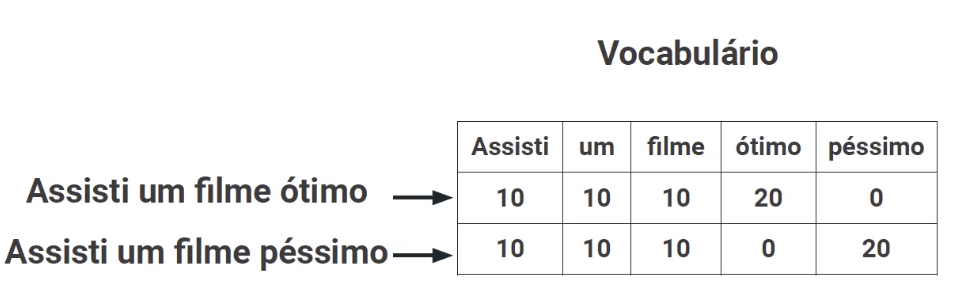

* max_features: limite de posições para o modelo
* max_df: remove a feature do token, caso tenha uma frequência acima do threshold (0-1).

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vetorizador = TfidfVectorizer(max_features=5000, max_df=0.85)

In [17]:
dados_treino_vetor = dados['Perguntas']
# dados_treino_vetor = X_train
# Faz sentido treinar com dados de teste?

vetorizador.fit(dados_treino_vetor)

X_train_tfidf = vetorizador.transform(X_train)
X_test_tfidf = vetorizador.transform(X_test)

In [18]:
X_train_tfidf.shape

(4326, 5000)

In [19]:
X_test_tfidf.shape

(1082, 5000)

## <font color=orange><b>3.3 Relevância Binária</b></font>

Relevância Binária é o método de aplicação de diversas classificações binárias para um conjunto de colunas. Esta é uma estratégia para a classificação multilabel.

**Algorítmo OneVsRest**

O classificar Relevância Binária é implementada através do algorítmo [OneVsRest](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) do Scikit-learn.

Ao ser implementado, ele exige um estimador, ou seja, um algorítmo de classificação para ser executado em background. Alguns exemples são:

* SVC
* Regressão Logística
* Decision Tree etc

> [Exemplos de uso da função](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#examples-using-sklearn-multiclass-onevsrestclassifier)

In [20]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression()
classificador_onevsrest = OneVsRestClassifier(estimator = regressao_logistica)
classificador_onevsrest

OneVsRestClassifier(estimator=LogisticRegression())

In [21]:
# Conversão para um array de listas
import numpy as np

y_train_array = np.asarray(list(y_train))
y_test_array = np.asarray(list(y_test))

In [22]:
classificador_onevsrest.fit(X_train_tfidf, y_train_array)

OneVsRestClassifier(estimator=LogisticRegression())

## <font color=orange><b>3.4 Avaliação</b></font>


### <font color=orange>Exact Match</font>

A acurácia mede, no caso de classificação multilabel, os registros que possuírem todas as subclassificações corretamente. Por isso, ela também é chamada de *extact match*.

In [23]:
resultado_onevsrest = classificador_onevsrest.score(X_test_tfidf, y_test_array)
print(f'Resultado de acurácia: {resultado_onevsrest:.2%}')

Resultado de acurácia: 41.68%


**Combinações possíveis**

In [24]:
# Combinações possíveis
2**4

16

In [25]:
# Combinações existentes
len(dados['todas_tags'].unique())

13

### <font color=orange>Hamming Loss</font>

A métrica de Hamming Loss busca medir a distância entre a predição e os valores esperados, através da distância Hamming. Quanto maior a distância, maior a divergência com a predição perfeita. 

A Hamming Loss (perda de hamming) é calculada:

$$\frac{Distancia_{Hamming}}{Total\_de\_Previsões} = \frac{\sum{Erros}}{Total}$$

Desta forma, `hamming_loss=0` representa o modelo perfeito. Já `hamming_loss=1` representa que o modelo não foi capaz de acertar qualquer label.

> A principal diferença é que o Hamming loss avalia os acertos de cada label individualmente, enquanto a acurácia avalia a combinação das labels, ou seja, será considerado correto apenas se o classificador acertar todas as labels de uma determinada instância. Para o Hamming Loss, quanto mais próximo de 0 melhor o resultado, enquanto para a acurácia o melhor resultado é o mais próximo de 1.

In [26]:
from sklearn.metrics import hamming_loss

previsao_onevsrest = classificador_onevsrest.predict(X_test_tfidf)
hamming_loss_onevsrest = hamming_loss(y_test_array, previsao_onevsrest)

print(f'Resultado de hamming loss: {hamming_loss_onevsrest:.2f}')

Resultado de hamming loss: 0.19


## <font color=orange><b>3.5 Classificação em Cadeia - Relação entre labels</b></font>


O modelo usado de Relevância Binária (One vs Rest) possui a premissa da independência das labels, ou seja, a ocorrência de uma label, não impacta na ocorrência de outras labels.

No entanto, essa premissa pode não ser verdadeira no nosso fenômeno. Para conseguir incorporar esta relação no modelo podeoos usar um modelo de classificação em cadeia.

O mecanismo para incorporar a relação entre as labels é através do processo recursão, em que após a primeira classificação binária acontencer, a variável predita é utilizada como variável preditora para a próxima label a ser predita. Assim, cria-se a estrutura de cadeia para as labels.

* Transformação do problema em algo mais simples: 
    > * "The problem transformation approach to multi-label classification converts multi-label problems to single-label problems: single-class or multi-class."
* Adaptação dos algorítmos
    > * Algorithm adaptation methods for multi-label classification concentrate on adapting single-label classification algorithms to the multi-label case usually by changes in cost/decision functions.

In [27]:
# Avaliação da correlação entre as labels
dados.corr()

,node.js,jquery,html,angular
node.js,1.000000,-0.321485,-0.273523,-0.101787
jquery,-0.321485,1.000000,-0.253977,-0.366269
html,-0.273523,-0.253977,1.000000,-0.286706
angular,-0.101787,-0.366269,-0.286706,1.000000


**Implementação da classificação recursisva**

> [Scikit-learn multilearn](http://scikit.ml/userguide.html)

In [28]:
!pip install scikit-multilearn==0.24.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement scikit-multilearn==0.24.1 (from versions: 0.2.0.linux-x86_64, 0.0.1, 0.0.3, 0.0.4, 0.0.5, 0.1.0, 0.2.0)
ERROR: No matching distribution found for scikit-multilearn==0.24.1


In [29]:
from skmultilearn.problem_transform import ClassifierChain

regressao_logistica = LogisticRegression()
classificador_cadeia = ClassifierChain(regressao_logistica)
classificador_cadeia.fit(X_train_tfidf, y_train_array)
resultado_cadeia = classificador_cadeia.score(X_test_tfidf, y_test_array)

previsao_cadeia = classificador_cadeia.predict(X_test_tfidf)
hamming_loss_cadeia = hamming_loss(y_test_array, previsao_cadeia)

print('==== CLASSIFICADOR EM CADEIA ====')
print(f'Resultado acurácia: {resultado_cadeia:.2%}')
print(f'Resultado hamming loss: {hamming_loss_cadeia:.2f}')

==== CLASSIFICADOR EM CADEIA ====
Resultado acurácia: 49.82%
Resultado hamming loss: 0.21


In [30]:
# Relevância Binária com o Skmultilearn
from skmultilearn.problem_transform import BinaryRelevance

regressao_logistica = LogisticRegression()
classificador_bn = BinaryRelevance(regressao_logistica)
classificador_bn.fit(X_train_tfidf, y_train_array)
resultado_bn = classificador_bn.score(X_test_tfidf, y_test_array)

previsao_bn = classificador_bn.predict(X_test_tfidf)
hamming_loss_bn = hamming_loss(y_test_array, previsao_bn)

print('==== CLASSIFICADOR EM RELEVANCIA BINARIA ====')
print(f'Resultado acurácia: {resultado_bn:.2%}')
print(f'Resultado hamming loss: {hamming_loss_bn:.2f}')

==== CLASSIFICADOR EM RELEVANCIA BINARIA ====
Resultado acurácia: 41.68%
Resultado hamming loss: 0.19


**Comparação dos Modelos**

A comparação dos modelos mostra que eles tiveram melhores performances em aspectos diferentes. A escolha do melhor modelo irá depender do contexto.

A acurácia leva em consideração o acerto de todas as labels de um registro. Então ela é importante quando o problema exige maior acerto do conjunto em um mesmo registro.

Já o hamming loss considera os acertos parciais. Então ele é mais importante quando as partes são mais importantes do que o acerto concentrado em um registro.

Outra consideração é sobre os falsos positivos e os falsos negativos. Dependendo da aplicação, é interessante reduzir reduzir um dos tipos de erros, para reduzir o impacto negativo do pior erro para o problema. Logo, isso exige a compreensão do problema e do impacto dos erros.

## <font color=orange><b>3.6 ML-KNN - Algorítmo Adaptado</b></font>

> [Artigo original do algorítmo](https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/pr07.pdf)
> [Referência do Scikit-Multi-Learning](http://scikit.ml/api/skmultilearn.html#module-skmultilearn.adapt)

O [ML-KNN](http://scikit.ml/api/skmultilearn.adapt.mlknn.html#skmultilearn.adapt.MLkNN) é uma adaptação ao algorítmo de KNN, a qual realiza classificações binárias. A adptação, ao identificar os elementos mais próximos, considera a 

**Implementação**

In [34]:
from skmultilearn.adapt import MLkNN

classificador_mlknn = MLkNN(k=10)
classificador_mlknn.fit(X_train_tfidf, y_train_array)

resultado_mlknn = classificador_mlknn.score(X_test_tfidf, y_test_array)

previsao_mlknn = classificador_mlknn.predict(X_test_tfidf)
hamming_loss_mlknn = hamming_loss(y_test_array, previsao_mlknn)

print('==== CLASSIFICADOR EM KNN MULTI-LABEL ====')
print(f'Resultado acurácia: {resultado_mlknn:.2%}')
print(f'Resultado hamming loss: {hamming_loss_mlknn:.2f}')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


==== CLASSIFICADOR EM KNN MULTI-LABEL ====
Resultado acurácia: 32.53%
Resultado hamming loss: 0.25


### <font color=orange><b>Aplicação do GridSearch</b></font>


In [ ]:
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import GridSearchCV

# Configuração do GridSearch
# parameters = {'k': range(1,3), 's': [0.5, 0.7, 1.0]}
parameters = {'k': range(1,30,1)}
score = 'accuracy'  # f1_macro

clf_mlknn = GridSearchCV(MLkNN(), parameters, scoring=score, cv=2)
clf_mlknn.fit(X_train_tfidf, y_train_array)

In [88]:
print(clf_mlknn.best_params_, clf_mlknn.best_score_)

{'k': 20} 0.35760517799352753


In [90]:
clf_mlknn.cv_results_

{'mean_fit_time': array([0.76988935, 0.7771076 , 0.8270694 , 0.85328674, 0.92935848,
        0.90326107, 0.91947174, 0.94511259, 0.99578643, 0.96923339,
        0.98149335, 0.9959023 , 1.0647465 , 1.04515958, 1.04657638,
        1.0786711 , 1.15035546, 1.14047301, 1.39518535, 2.41889489,
        1.16502285, 1.16898477, 1.23994756, 1.19643092, 1.22444284,
        1.230919  , 1.24396884, 1.28372002, 1.28942204]),
 'std_fit_time': array([9.66596603e-03, 2.24196911e-03, 1.46230459e-02, 2.39849091e-04,
        4.36847210e-02, 5.01549244e-03, 4.77051735e-03, 1.36028528e-02,
        3.92234325e-02, 1.83881521e-02, 1.03207827e-02, 7.96079636e-04,
        3.22195292e-02, 2.31266022e-04, 5.19859791e-03, 1.19351149e-02,
        6.76740408e-02, 3.59605551e-02, 3.25552225e-02, 3.34055543e-01,
        6.81757927e-03, 7.92741776e-05, 4.96768951e-02, 3.91650200e-03,
        8.29994678e-03, 1.93822384e-03, 1.39605999e-03, 1.40781403e-02,
        1.02794170e-02]),
 'mean_score_time': array([1.42813826, 

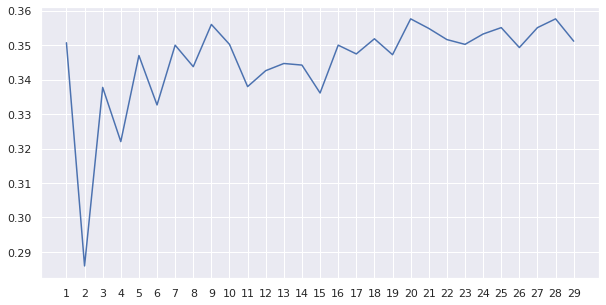

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize=(10,5))
sns.lineplot(
    x = [i['k'] for i in clf_mlknn.cv_results_['params']],
    y = clf_mlknn.cv_results_['mean_test_score'])
plt.xticks([i['k'] for i in clf_mlknn.cv_results_['params']]);

# <font color=orange><b>4. Avaliação dos Resultados</b></font>


Comparação dos resultados dos modelos

In [70]:
resultados_classificacao = pd.DataFrame()

resultados_classificacao['perguntas'] = X_test.values
resultados_classificacao['tags real'] = list(y_test)
resultados_classificacao['RB'] = list(previsao_onevsrest)
resultados_classificacao['Cadeia'] = list(previsao_cadeia.toarray())
resultados_classificacao['MLKNN'] = list(previsao_mlknn.toarray())
resultados_classificacao

,perguntas,tags real,RB,Cadeia,MLKNN
0,estou com conflito entre o CODE e os CODE ...,"(0, 1, 0, 0)","[0, 1, 0, 0]","[0.0, 1.0, 0.0, 0.0]","[0, 0, 0, 0]"
1,Estou fazendo um site que eu sou obrigado a us...,"(0, 0, 1, 0)","[0, 0, 1, 0]","[0.0, 0.0, 1.0, 0.0]","[0, 1, 1, 0]"
2,Recentemente fiz um refactor do meu código par...,"(1, 0, 0, 0)","[1, 0, 0, 0]","[1.0, 0.0, 0.0, 0.0]","[1, 0, 0, 0]"
3,Eu tenho esse código em CODE que passo valore...,"(0, 1, 1, 0)","[0, 1, 0, 0]","[0.0, 1.0, 0.0, 0.0]","[0, 1, 1, 0]"
4,"Olá, em minha função tem o evento CODE que de...","(0, 1, 1, 0)","[0, 1, 0, 0]","[0.0, 1.0, 0.0, 0.0]","[0, 1, 1, 0]"
...,...,...,...,...,...
1077,Estou a desenvolver um website em jQuery. E at...,"(0, 1, 0, 0)","[0, 1, 1, 0]","[0.0, 1.0, 1.0, 0.0]","[0, 0, 1, 0]"
1078,Estou usando este plugin - jquery autocomplete...,"(0, 1, 0, 0)","[0, 1, 0, 0]","[0.0, 1.0, 0.0, 0.0]","[0, 1, 0, 0]"
1079,"Tenho o seguinte jQuery: CODE Nisto, quanti...","(0, 1, 0, 0)","[0, 1, 0, 0]","[0.0, 1.0, 0.0, 0.0]","[0, 1, 0, 0]"
1080,Estou usando o SimpleModal Contact Form de Eri...,"(0, 1, 0, 0)","[0, 1, 0, 0]","[0.0, 1.0, 0.0, 0.0]","[0, 1, 0, 0]"


In [71]:
resultados_classificacao.loc[2]

perguntas    Recentemente fiz um refactor do meu código par...
tags real                                         (1, 0, 0, 0)
RB                                                [1, 0, 0, 0]
Cadeia                                    [1.0, 0.0, 0.0, 0.0]
MLKNN                                             [1, 0, 0, 0]
Name: 2, dtype: object

In [73]:
resultados_classificacao.loc[2, 'perguntas']

'Recentemente fiz um refactor do meu código para adotar o padrão MVC, pois o mesmo estava muito desorganizado!  Entretanto, começou a aparecer um erro chamado "Too many connections". Esse erro faz com que o meu node-mysql cai e não realize mais requisições até que eu restart o node.  Link do código: https://github.com/LeonardoVini/node-refctoring/blob/master/refctoring-backend.zip  Não sei o ES6 esteja causando isso ou eu tenha feito algo de errado. Eu tentei diversas vezes arrumar este erro.  Erro que aparece:   Código de conexão:  CODE   server.js:  CODE   Arquivo de rotas:  CODE   Arquivo de controller:  CODE   Arquivo model:  CODE  '